In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Training and Testing Data:

In [22]:
train_df = pd.read_csv("to_train_fully_encocded.csv")
train_df.head()

,Unnamed: 0,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,7327552,0,1.099481,1.135354,1.133898,1.133981,1.135725,1.137676,18,10,...,0,1,0,0,0,0,1,0,1,0.922891
1,7768450,1,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,23,14,...,0,0,1,0,1,0,0,1,0,0.922891
2,2559045,2,0.921245,1.135354,1.133898,1.133981,1.135725,1.137676,4,16,...,0,0,1,0,1,0,0,0,1,0.922891
3,4956177,1,1.098595,1.135354,1.133898,1.133981,1.135725,1.137676,10,16,...,0,0,1,0,1,0,0,1,0,0.922891
4,8837109,2,1.182732,1.135354,1.133898,1.133981,1.135725,1.137676,21,9,...,0,0,1,0,1,0,0,0,1,0.922891


In [23]:
train_df.columns

Index(['Unnamed: 0', 'IncidentGrade', 'EntityType', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'OSVersion', 'hour', 'day',
       ...
       'SuspicionLevel_Incriminated', 'SuspicionLevel_Suspicious',
       'SuspicionLevel_Unknown', 'LastVerdict_Malicious',
       'LastVerdict_No Verdict', 'LastVerdict_NoThreatsFound',
       'LastVerdict_Suspicious', 'EvidenceRole_0', 'EvidenceRole_1',
       'hash_frequency'],
      dtype='object', length=148)

In [24]:
test_df = pd.read_csv("to_test_fully_encocded.csv")
test_df.head()

,Unnamed: 0,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,617542,1,0.948053,1.143666,1.141972,1.142192,1.143788,1.144947,13,6,...,0,0,1,0,1,0,0,0,1,0.000012
1,2871047,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,11,4,...,0,0,1,0,1,0,0,0,1,0.920557
2,3093569,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,14,11,...,0,1,0,0,0,0,1,0,1,0.920557
3,1485979,1,1.036728,1.143666,1.141972,1.142192,1.143788,1.144947,23,9,...,0,1,0,0,0,0,1,1,0,0.001756
4,877816,2,1.257172,1.143666,1.141972,1.142192,1.143788,1.144947,6,10,...,0,0,1,0,1,0,0,1,0,0.920557


In [25]:
test_df.columns

Index(['Unnamed: 0', 'IncidentGrade', 'EntityType', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationName',
       'OSVersion', 'hour', 'day',
       ...
       'SuspicionLevel_Incriminated', 'SuspicionLevel_Suspicious',
       'SuspicionLevel_Unknown', 'LastVerdict_Malicious',
       'LastVerdict_No Verdict', 'LastVerdict_NoThreatsFound',
       'LastVerdict_Suspicious', 'EvidenceRole_0', 'EvidenceRole_1',
       'hash_frequency'],
      dtype='object', length=145)

## Matching their Shapes:

In [31]:
import pandas as pd

# Find mismatched columns
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Columns to drop from train_df and test_df
columns_to_drop_from_train = train_columns - test_columns
columns_to_drop_from_test = test_columns - train_columns

# Drop mismatched columns
train_df = train_df.drop(columns=columns_to_drop_from_train, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop_from_test, errors='ignore')

# Verify the shapes and columns are the same
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)
print("Matching Columns:", train_df.columns.equals(test_df.columns))


Train DataFrame Shape: (497324, 90)
Test DataFrame Shape: (499992, 90)
Matching Columns: True


In [32]:
train_df.head()

,Unnamed: 0,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,7327552,0,1.099481,1.135354,1.133898,1.133981,1.135725,1.137676,18,10,...,0,1,0,0,0,0,1,0,1,0.922891
1,7768450,1,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,23,14,...,0,0,1,0,1,0,0,1,0,0.922891
2,2559045,2,0.921245,1.135354,1.133898,1.133981,1.135725,1.137676,4,16,...,0,0,1,0,1,0,0,0,1,0.922891
3,4956177,1,1.098595,1.135354,1.133898,1.133981,1.135725,1.137676,10,16,...,0,0,1,0,1,0,0,1,0,0.922891
4,8837109,2,1.182732,1.135354,1.133898,1.133981,1.135725,1.137676,21,9,...,0,0,1,0,1,0,0,0,1,0.922891


In [33]:
test_df.head()

,Unnamed: 0,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,617542,1,0.948053,1.143666,1.141972,1.142192,1.143788,1.144947,13,6,...,0,0,1,0,1,0,0,0,1,0.000012
1,2871047,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,11,4,...,0,0,1,0,1,0,0,0,1,0.920557
2,3093569,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,14,11,...,0,1,0,0,0,0,1,0,1,0.920557
3,1485979,1,1.036728,1.143666,1.141972,1.142192,1.143788,1.144947,23,9,...,0,1,0,0,0,0,1,1,0,0.001756
4,877816,2,1.257172,1.143666,1.141972,1.142192,1.143788,1.144947,6,10,...,0,0,1,0,1,0,0,1,0,0.920557


In [34]:
train_df= train_df.drop(columns=['Unnamed: 0'])
test_df= test_df.drop(columns=['Unnamed: 0'])

In [35]:
train_data = train_df.copy()
train_df.head()

,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,weekday,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,0,1.099481,1.135354,1.133898,1.133981,1.135725,1.137676,18,10,0,...,0,1,0,0,0,0,1,0,1,0.922891
1,1,0.770566,1.135354,1.133898,1.133981,1.135725,1.137676,23,14,4,...,0,0,1,0,1,0,0,1,0,0.922891
2,2,0.921245,1.135354,1.133898,1.133981,1.135725,1.137676,4,16,6,...,0,0,1,0,1,0,0,0,1,0.922891
3,1,1.098595,1.135354,1.133898,1.133981,1.135725,1.137676,10,16,6,...,0,0,1,0,1,0,0,1,0,0.922891
4,2,1.182732,1.135354,1.133898,1.133981,1.135725,1.137676,21,9,6,...,0,0,1,0,1,0,0,0,1,0.922891


In [36]:
test_data = test_df.copy()
test_df.head()

,IncidentGrade,EntityType,RegistryKey,RegistryValueName,RegistryValueData,ApplicationName,OSVersion,hour,day,weekday,...,SuspicionLevel_Incriminated,SuspicionLevel_Suspicious,SuspicionLevel_Unknown,LastVerdict_Malicious,LastVerdict_No Verdict,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,EvidenceRole_0,EvidenceRole_1,hash_frequency
0,1,0.948053,1.143666,1.141972,1.142192,1.143788,1.144947,13,6,3,...,0,0,1,0,1,0,0,0,1,0.000012
1,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,11,4,1,...,0,0,1,0,1,0,0,0,1,0.920557
2,1,1.245168,1.143666,1.141972,1.142192,1.143788,1.144947,14,11,1,...,0,1,0,0,0,0,1,0,1,0.920557
3,1,1.036728,1.143666,1.141972,1.142192,1.143788,1.144947,23,9,6,...,0,1,0,0,0,0,1,1,0,0.001756
4,2,1.257172,1.143666,1.141972,1.142192,1.143788,1.144947,6,10,0,...,0,0,1,0,1,0,0,1,0,0.920557


# Model Training & Testing:

## MODEL 1: Logical Regression : 

### 1.A Benchmark Model:

C:\Users\LENOVO\.conda\envs\mypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\LENOVO\.conda\envs\mypandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.7941
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71    108748
           1       0.81      0.85      0.83    211615
           2       0.78      0.82      0.80    179629

    accuracy                           0.79    499992
   macro avg       0.79      0.77      0.78    499992
weighted avg       0.79      0.79      0.79    499992



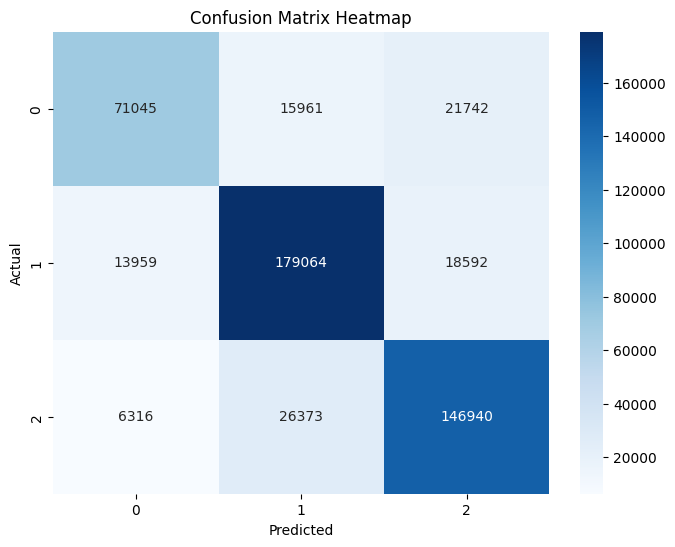

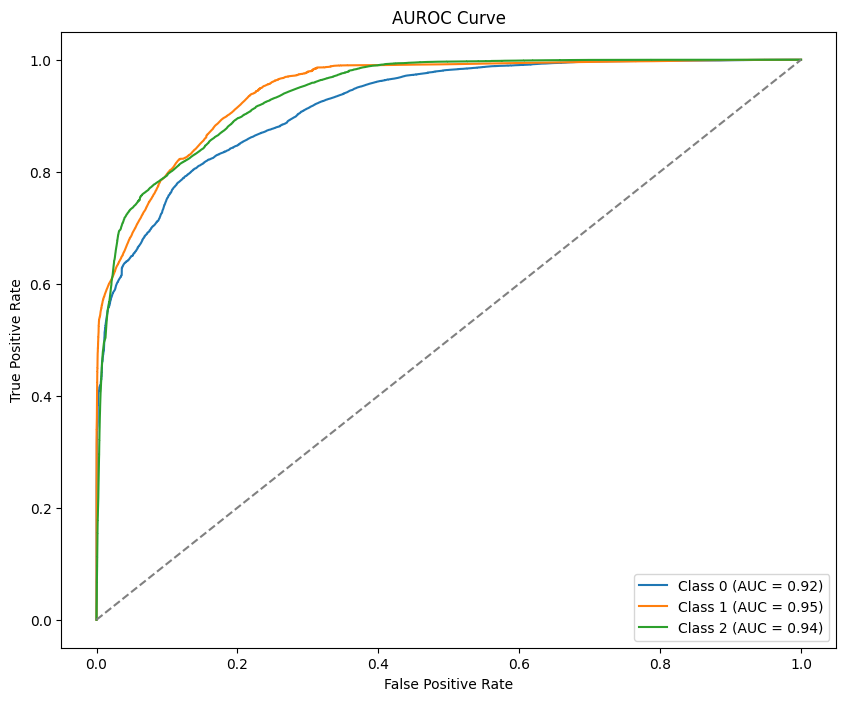

<Figure size 1000x800 with 0 Axes>

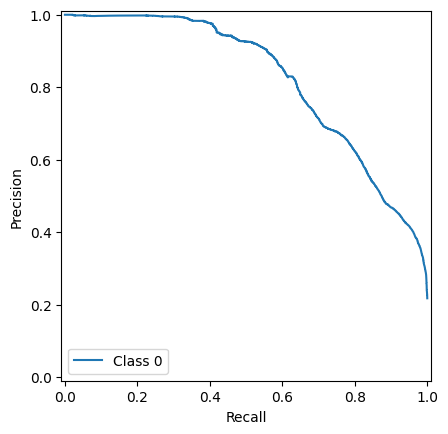

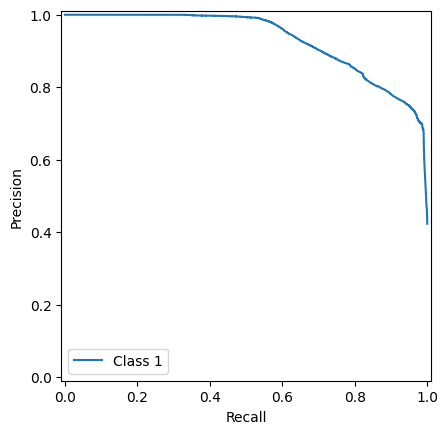

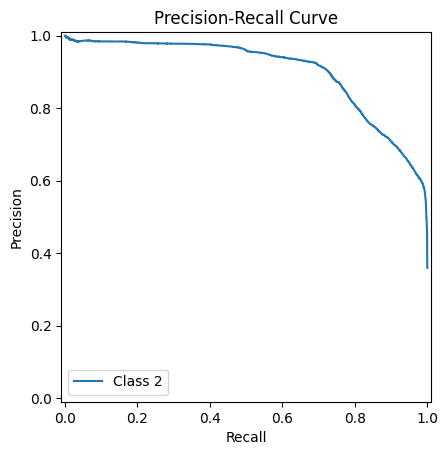

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Define features (X) and target (y)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

# Evaluation Metrics
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix and Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. AUROC Curve
# One-vs-all approach for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
    
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("AUROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 5. Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot(label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.show()


### 1.B Class Weights = Balanced: 

Accuracy Score: 0.7774
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69    108748
           1       0.88      0.74      0.81    211615
           2       0.75      0.85      0.80    179629

    accuracy                           0.78    499992
   macro avg       0.77      0.77      0.77    499992
weighted avg       0.79      0.78      0.78    499992



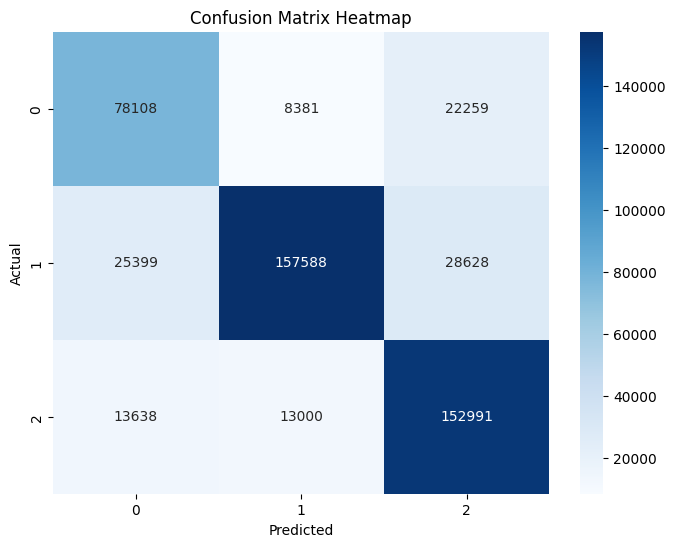

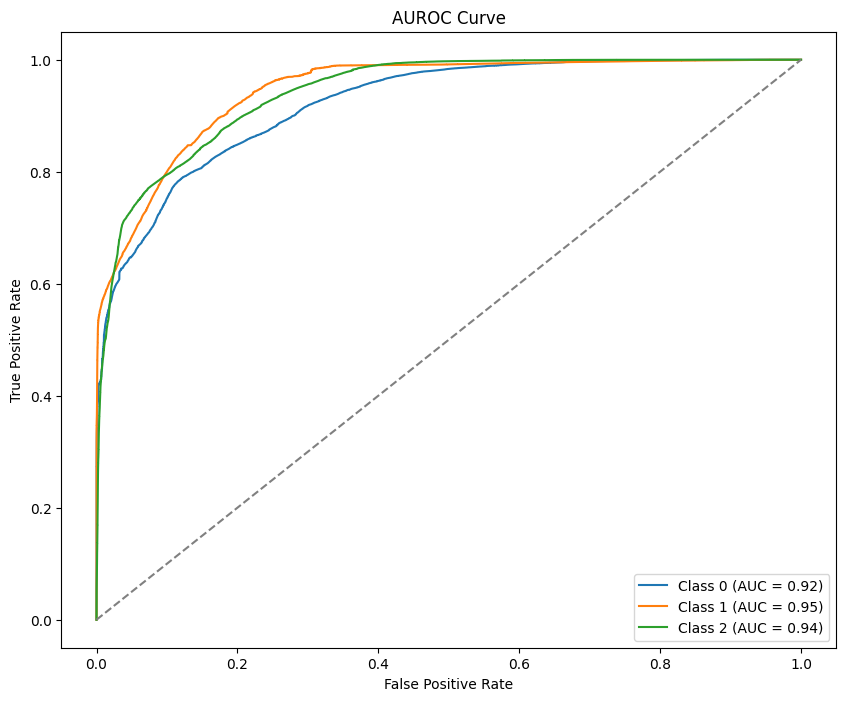

<Figure size 1000x800 with 0 Axes>

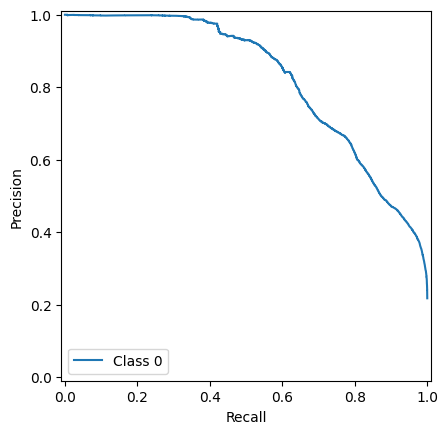

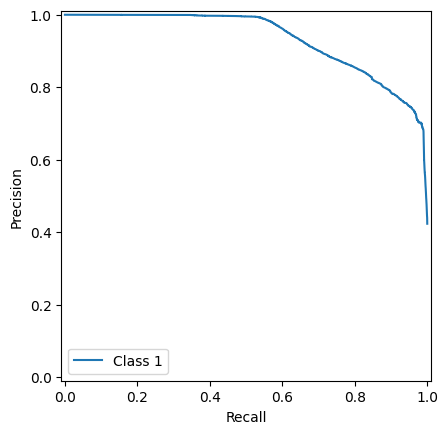

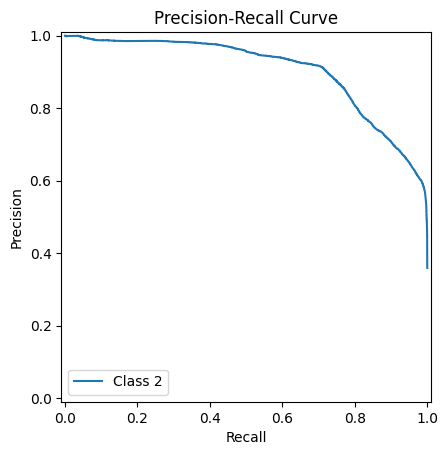

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Define features (X) and target (y)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Create a pipeline with scaling and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler step
    ('classifier', OneVsRestClassifier(
        LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    ))  # Logistic Regression step
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("AUROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot(label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.show()


### 1.C Log-Reg SMOTE :

Accuracy Score: 0.7754
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68    108748
           1       0.88      0.75      0.81    211615
           2       0.77      0.83      0.80    179629

    accuracy                           0.78    499992
   macro avg       0.76      0.77      0.76    499992
weighted avg       0.79      0.78      0.78    499992



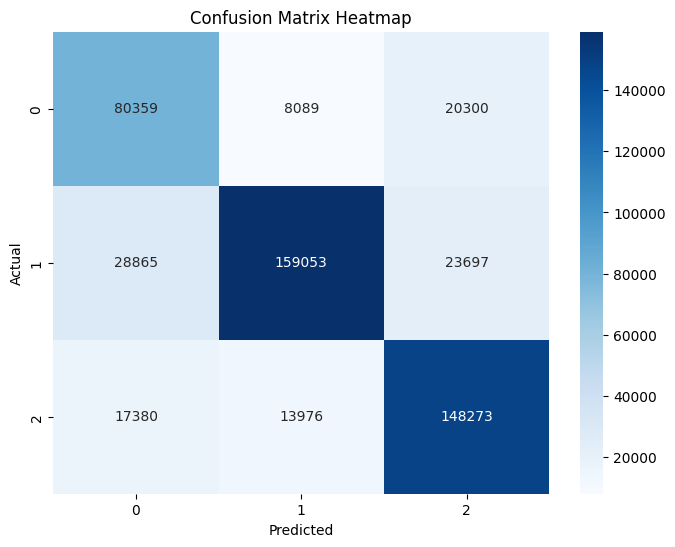

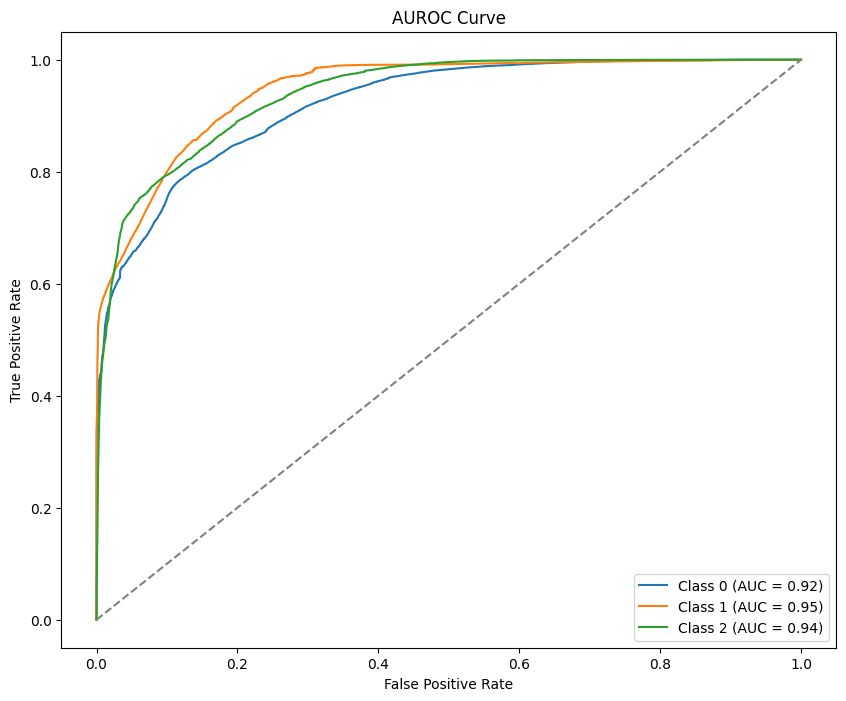

<Figure size 1000x800 with 0 Axes>

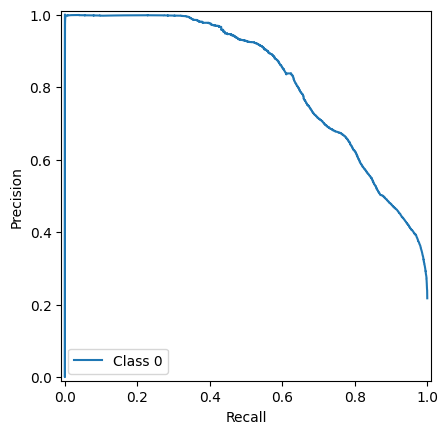

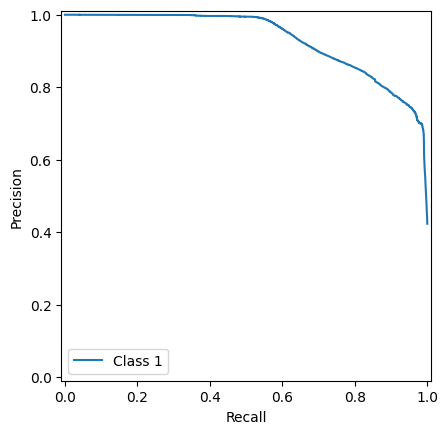

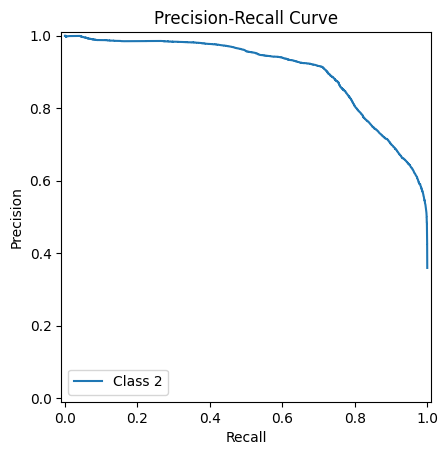

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Fit and transform training data using SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced')))
])

# Fit the pipeline to the resampled training data
pipeline.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("AUROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot(label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.show()

### 1.D RandomUnderSampling:

Accuracy Score: 0.7749
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69    108748
           1       0.89      0.73      0.80    211615
           2       0.74      0.86      0.80    179629

    accuracy                           0.77    499992
   macro avg       0.76      0.77      0.76    499992
weighted avg       0.79      0.77      0.78    499992



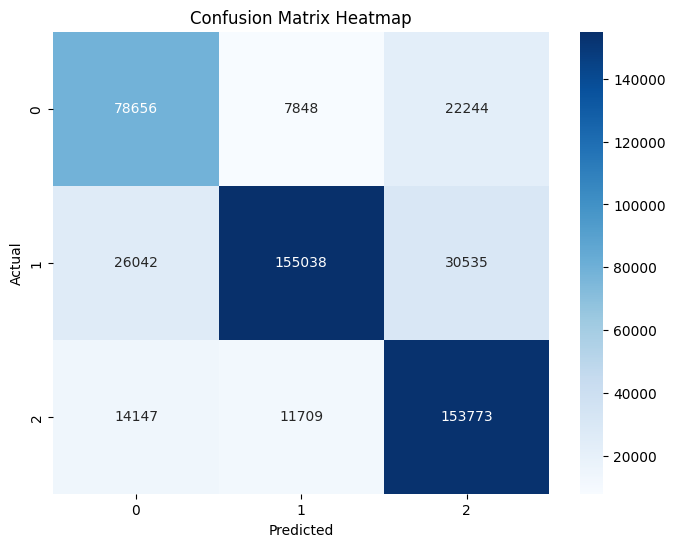

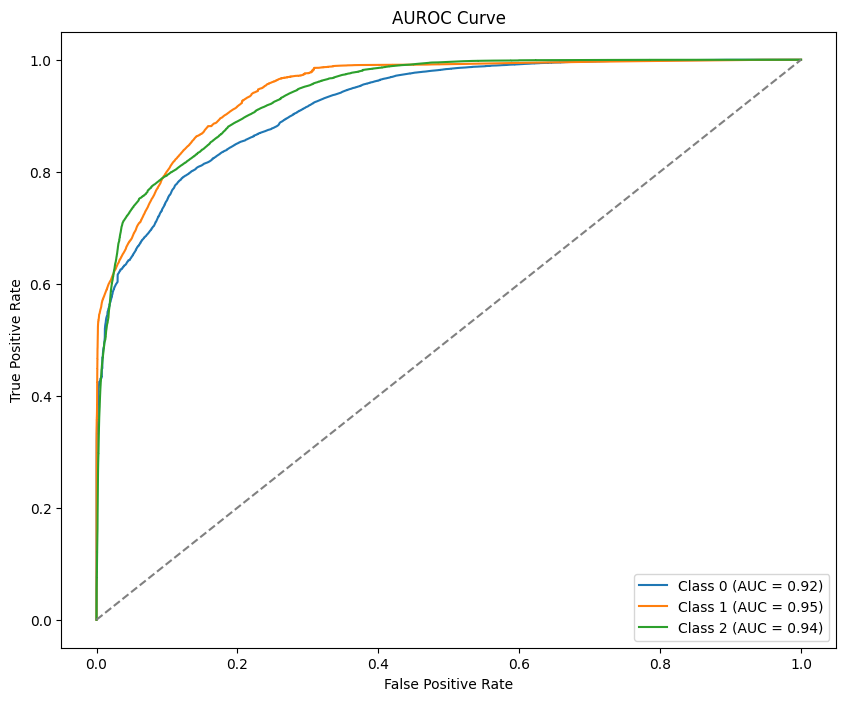

<Figure size 1000x800 with 0 Axes>

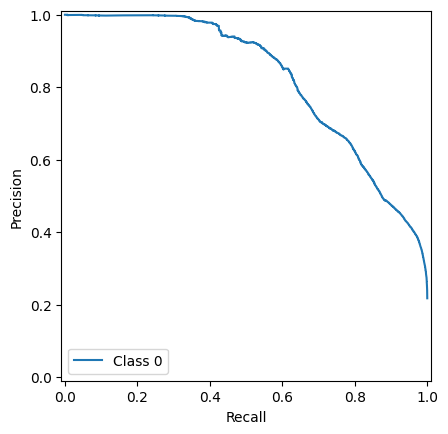

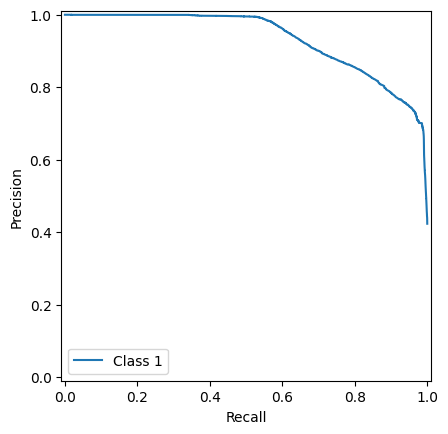

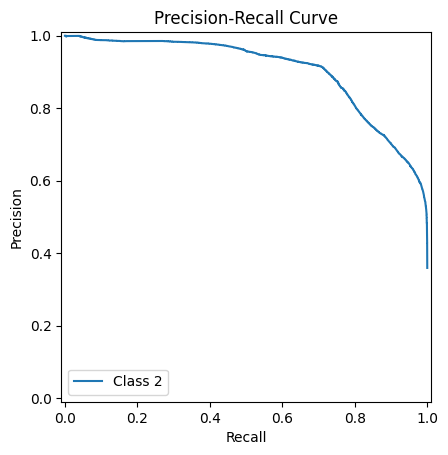

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

# Define features (X) and target (y)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply Random UnderSampling to balance the training data
under_sampler = RandomUnderSampler(random_state=42)

# Fit and transform training data using RandomUnderSampler
X_train_res, y_train_res = under_sampler.fit_resample(X_train, y_train)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')))
])

# Fit the pipeline to the undersampled training data
pipeline.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUROC Curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("AUROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot(label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.show()


## MODEL 2: RandomForest Model:

### 2.A Benchmark Model:

Accuracy Score: 0.8079

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72    108748
           1       0.79      0.90      0.84    211615
           2       0.84      0.79      0.81    179629

    accuracy                           0.81    499992
   macro avg       0.81      0.78      0.79    499992
weighted avg       0.81      0.81      0.81    499992



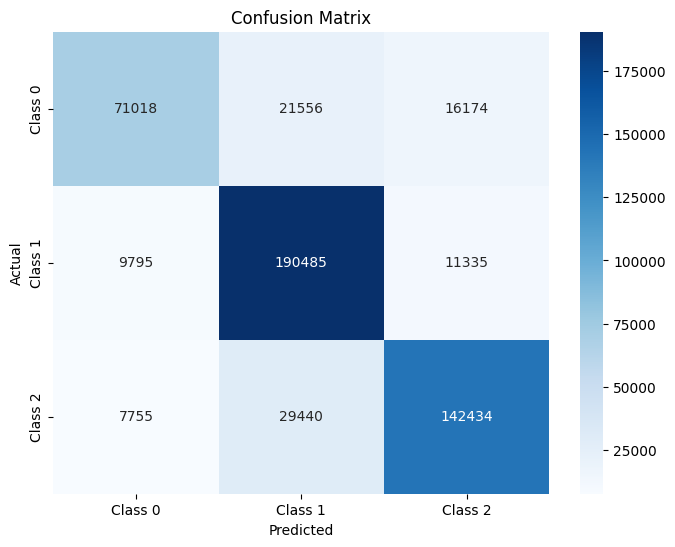

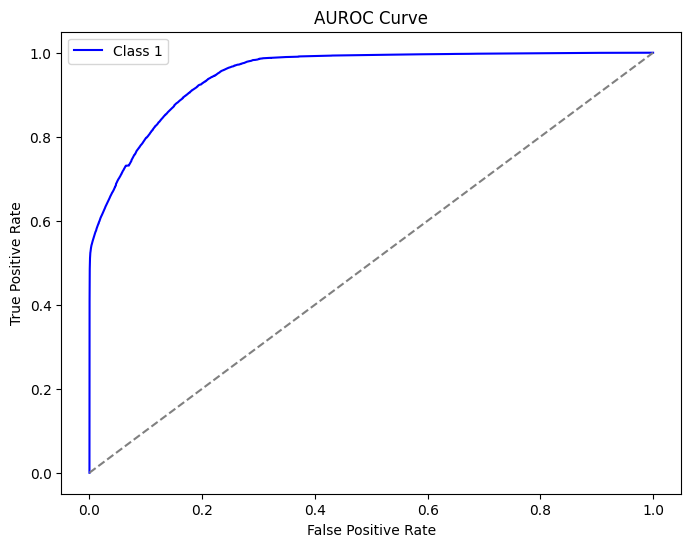

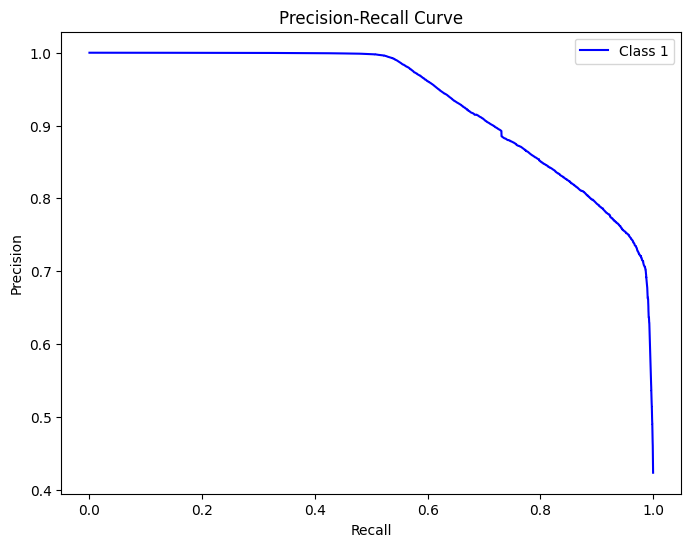

In [44]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler to the features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUROC curve (for each class)
y_prob = rf_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='Class 1')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title("AUROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Class 1')
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### 2.B Class weights - RF

Accuracy Score: 0.8046

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72    108748
           1       0.81      0.88      0.84    211615
           2       0.84      0.79      0.81    179629

    accuracy                           0.80    499992
   macro avg       0.80      0.78      0.79    499992
weighted avg       0.80      0.80      0.80    499992



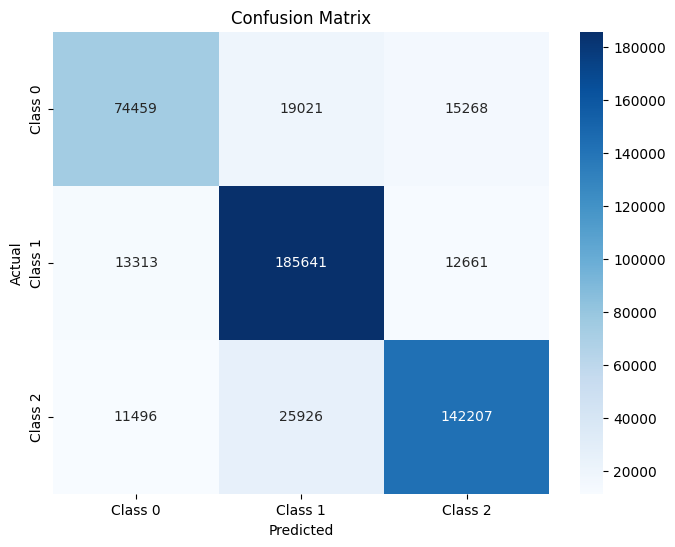

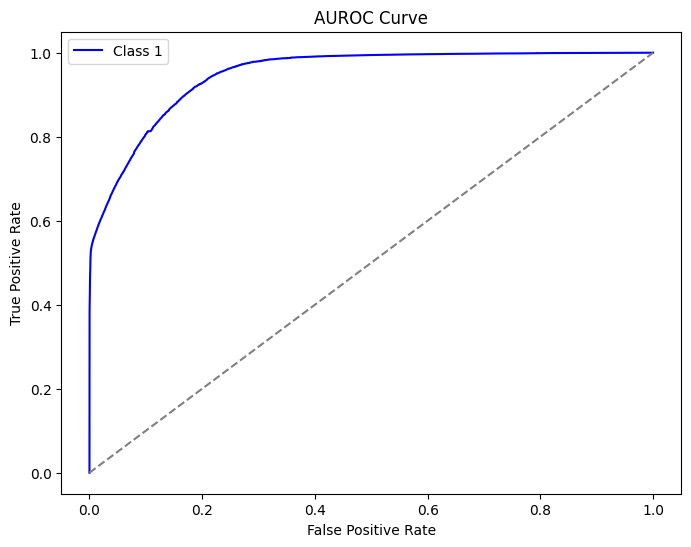

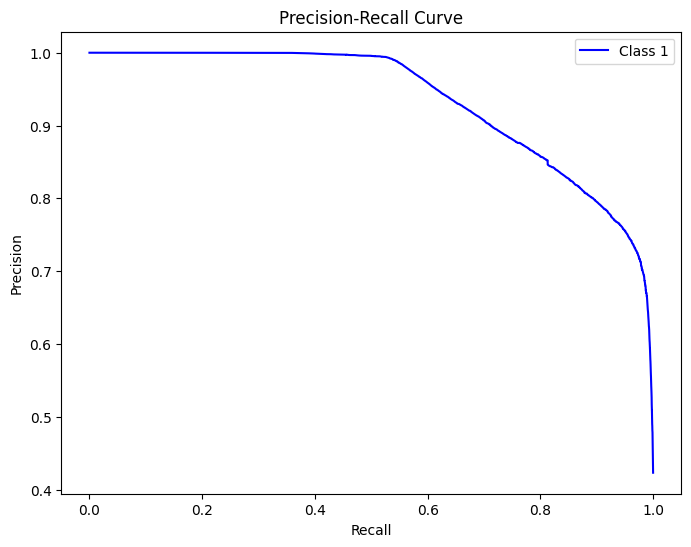

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler to the features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier with class weights
rf_model_with_weights = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model_with_weights.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model_with_weights.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUROC curve (for each class)
y_prob = rf_model_with_weights.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='Class 1')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title("AUROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Class 1')
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


### 2.C SMOTE - RF:

Accuracy Score: 0.7518

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.85      0.65    108748
           1       0.90      0.71      0.80    211615
           2       0.84      0.74      0.79    179629

    accuracy                           0.75    499992
   macro avg       0.76      0.77      0.74    499992
weighted avg       0.80      0.75      0.76    499992



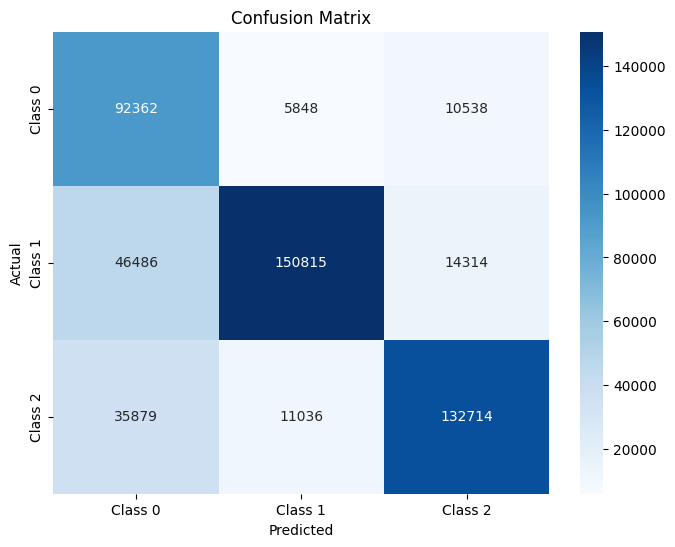

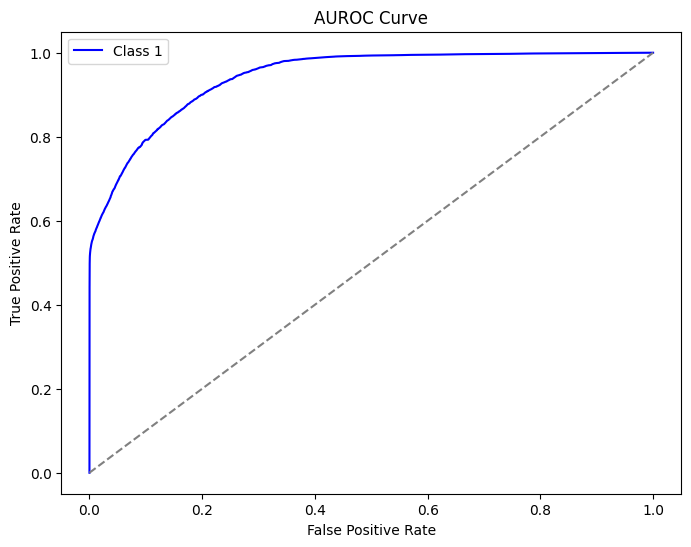

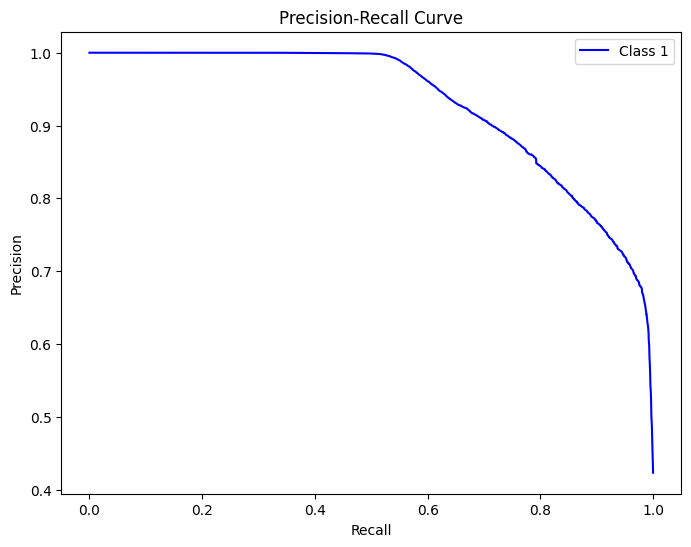

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler to the features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the Random Forest Classifier with class weights
rf_model_with_weights_smote = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with the resampled data
rf_model_with_weights_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model_with_weights_smote.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUROC curve (for each class)
y_prob = rf_model_with_weights_smote.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='Class 1')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title("AUROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Class 1')
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


### 2.D RandomUnderSampling - RF

Accuracy Score: 0.7993

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72    108748
           1       0.85      0.82      0.83    211615
           2       0.84      0.79      0.81    179629

    accuracy                           0.80    499992
   macro avg       0.78      0.79      0.79    499992
weighted avg       0.80      0.80      0.80    499992



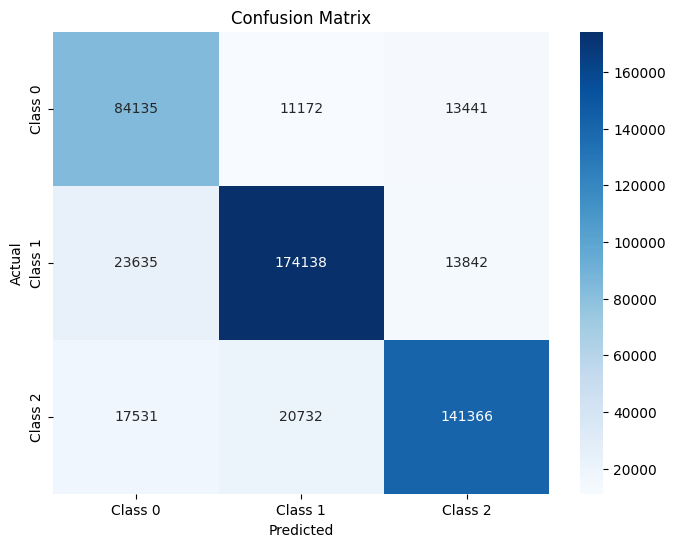

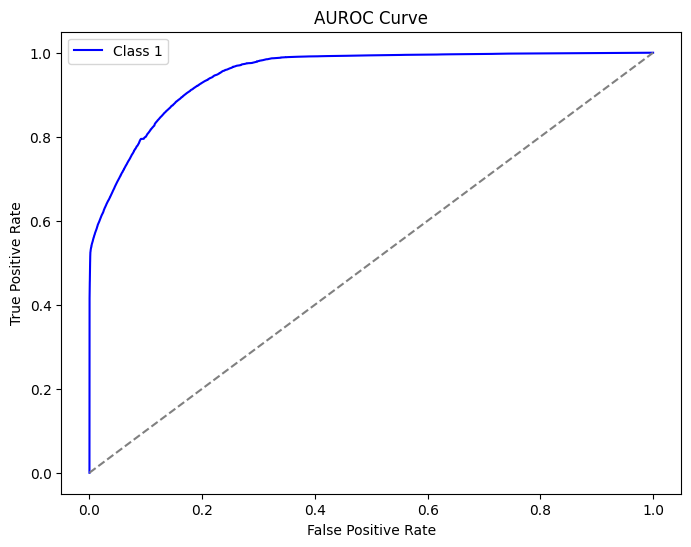

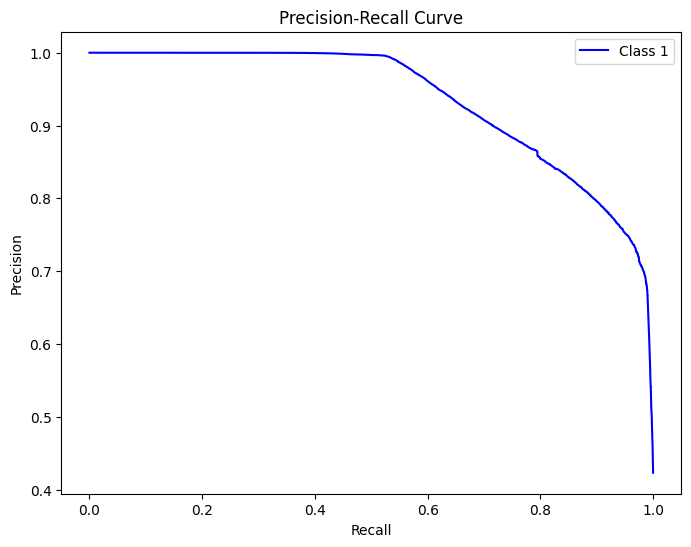

In [47]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler to the features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Random UnderSampling to balance the class distribution in the training data
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_scaled, y_train)

# Initialize the Random Forest Classifier with class weights
rf_model_with_weights_undersample = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with the undersampled data
rf_model_with_weights_undersample.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model_with_weights_undersample.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUROC curve (for each class)
y_prob = rf_model_with_weights_undersample.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='Class 1')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title("AUROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Class 1')
plt.title("Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


## MODEL 3: XGBOOST:

### 3.A Benchmark - XGB

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score: 0.7923

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72    108748
           1       0.83      0.83      0.83    211615
           2       0.73      0.85      0.79    179629

    accuracy                           0.79    499992
   macro avg       0.80      0.77      0.78    499992
weighted avg       0.80      0.79      0.79    499992



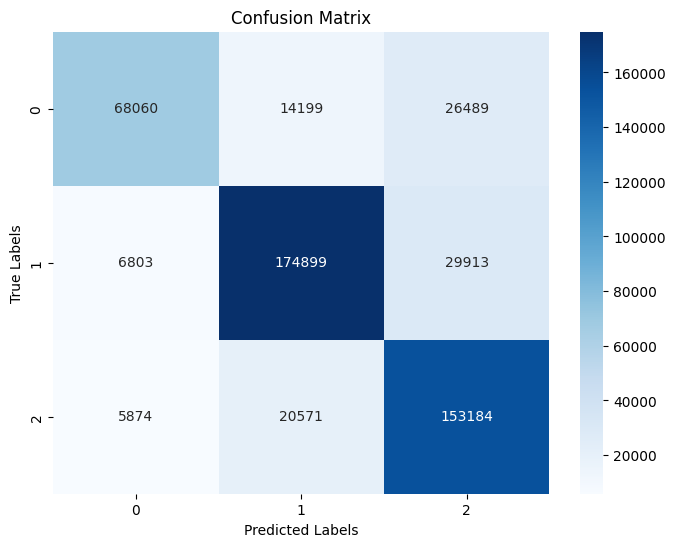

In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Prepare the train and test sets (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3.B Class weights - XGB

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:46:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score with Class Weights: 0.7923

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72    108748
           1       0.83      0.83      0.83    211615
           2       0.73      0.85      0.79    179629

    accuracy                           0.79    499992
   macro avg       0.80      0.77      0.78    499992
weighted avg       0.80      0.79      0.79    499992



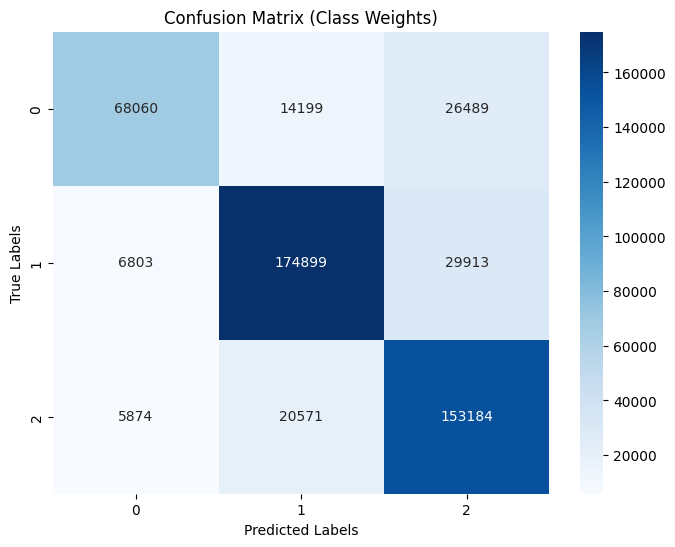

In [51]:
# Initialize XGBoost with class weights (balanced)
xgb_model_weighted = xgb.XGBClassifier(random_state=42, use_label_encoder=False, scale_pos_weight=1)

# Train the model
xgb_model_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = xgb_model_weighted.predict(X_test)

# Evaluate model performance
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy Score with Class Weights: {accuracy_weighted:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

# Confusion Matrix
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix (Class Weights)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3.C SMOTE - XGB

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:50:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score with SMOTE: 0.7054

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64    108748
           1       1.00      0.52      0.68    211615
           2       0.68      0.88      0.77    179629

    accuracy                           0.71    499992
   macro avg       0.74      0.73      0.70    499992
weighted avg       0.78      0.71      0.70    499992



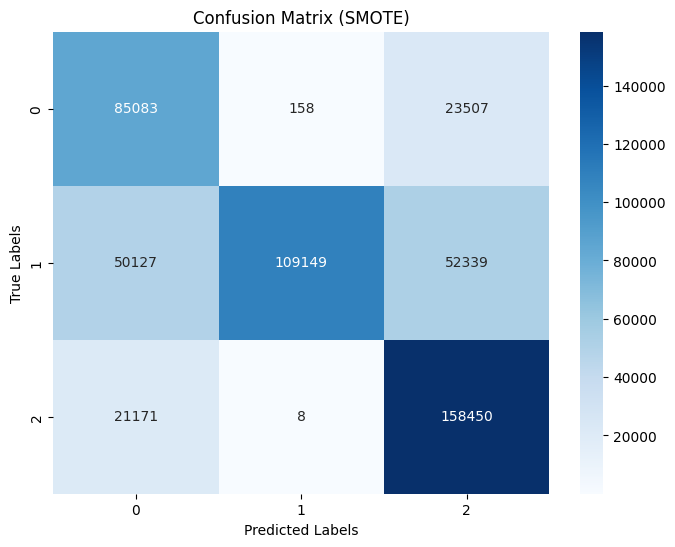

In [52]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with SMOTE data
xgb_model_smote = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = xgb_model_smote.predict(X_test)

# Evaluate model performance
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy Score with SMOTE: {accuracy_smote:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix (SMOTE)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 3.D Undersampling - XGB

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score with Random Undersampling: 0.7475

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72    108748
           1       0.96      0.61      0.75    211615
           2       0.64      0.93      0.76    179629

    accuracy                           0.75    499992
   macro avg       0.78      0.75      0.74    499992
weighted avg       0.80      0.75      0.75    499992



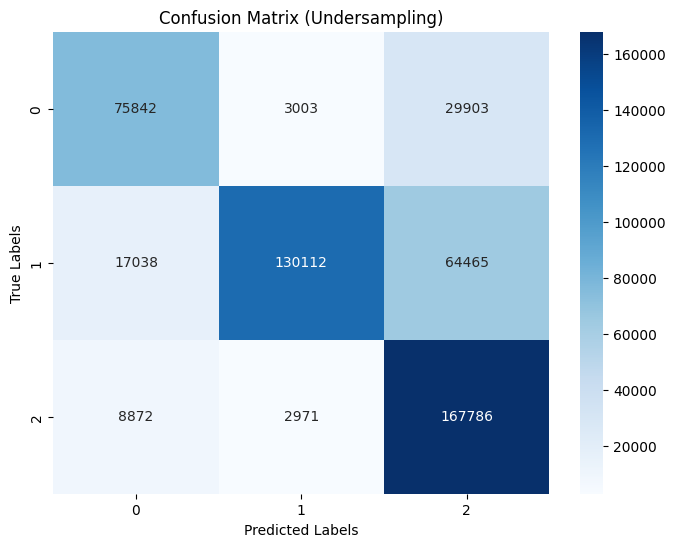

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to balance the dataset
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

# Train the model with undersampled data
xgb_model_undersample = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model_undersample.fit(X_train_undersample, y_train_undersample)

# Predict on the test set
y_pred_undersample = xgb_model_undersample.predict(X_test)

# Evaluate model performance
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
print(f"Accuracy Score with Random Undersampling: {accuracy_undersample:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_undersample))

# Confusion Matrix
cm_undersample = confusion_matrix(y_test, y_pred_undersample)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_undersample, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix (Undersampling)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Model 4: Gradient Boost:

In [54]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Splitting features and target for training and testing
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, description=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{description}")
    print(f"Accuracy Score: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# -----------------------------------
# 1. Basic Gradient Boosting Model
# -----------------------------------
gb_basic = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_basic, X_train, y_train, X_test, y_test, description="Basic Gradient Boosting")

# -----------------------------------
# 3. Gradient Boosting with SMOTE
# -----------------------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

gb_smote = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_smote, X_smote, y_smote, X_test, y_test, description="Gradient Boosting with SMOTE")

# -----------------------------------
# 4. Gradient Boosting with Random Undersampling
# -----------------------------------
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)

gb_undersample = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_undersample, X_under, y_under, X_test, y_test, description="Gradient Boosting with Random Undersampling")



Basic Gradient Boosting
Accuracy Score: 0.7958

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72    108748
           1       0.82      0.83      0.83    211615
           2       0.76      0.84      0.80    179629

    accuracy                           0.80    499992
   macro avg       0.80      0.77      0.78    499992
weighted avg       0.80      0.80      0.79    499992


Gradient Boosting with SMOTE
Accuracy Score: 0.7297

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68    108748
           1       0.99      0.56      0.71    211615
           2       0.67      0.90      0.77    179629

    accuracy                           0.73    499992
   macro avg       0.76      0.75      0.72    499992
weighted avg       0.79      0.73      0.73    499992


Gradient Boosting with Random Undersampling
Accuracy Score: 0.7825

Classification Repor

### Model 5: LightGBM

In [55]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Splitting features and target for training and testing
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic LightGBM model
print("Running Basic LightGBM...")
basic_model = lgb.LGBMClassifier(random_state=42)
basic_model.fit(X_train_scaled, y_train)
basic_predictions = basic_model.predict(X_test_scaled)
print("Basic LightGBM:")
print(f"Accuracy Score: {accuracy_score(y_test, basic_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, basic_predictions))

# LightGBM with class weights
print("\nRunning LightGBM with Class Weights...")
class_weights = {0: 1.0, 1: 0.5, 2: 0.75}  # Update weights as necessary
weighted_model = lgb.LGBMClassifier(class_weight=class_weights, random_state=42)
weighted_model.fit(X_train_scaled, y_train)
weighted_predictions = weighted_model.predict(X_test_scaled)
print("\nLightGBM with Class Weights:")
print(f"Accuracy Score with Class Weights: {accuracy_score(y_test, weighted_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, weighted_predictions))

# LightGBM with SMOTE
print("\nRunning LightGBM with SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
smote_model = lgb.LGBMClassifier(random_state=42)
smote_model.fit(X_train_smote, y_train_smote)
smote_predictions = smote_model.predict(X_test_scaled)
print("\nLightGBM with SMOTE:")
print(f"Accuracy Score with SMOTE: {accuracy_score(y_test, smote_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, smote_predictions))

# LightGBM with Random Undersampling
print("\nRunning LightGBM with Random Undersampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)
undersampling_model = lgb.LGBMClassifier(random_state=42)
undersampling_model.fit(X_train_under, y_train_under)
undersampling_predictions = undersampling_model.predict(X_test_scaled)
print("\nLightGBM with Random Undersampling:")
print(f"Accuracy Score with Random Undersampling: {accuracy_score(y_test, undersampling_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, undersampling_predictions))


Running Basic LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data points in the train set: 497324, number of used features: 72
[LightGBM] [Info] Start training from score -1.536534
[LightGBM] [Info] Start training from score -0.830165
[LightGBM] [Info] Start training from score -1.052978
Basic LightGBM:
Accuracy Score: 0.8118

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73    108748
           1       0.80      0.89      0.84    211615
           2       0.84      0.80      0.82    179629

    accuracy                           0.81    499992
   macro avg       0.81      0.79      0.80    499992
weighted avg       0.81      0.81      0.81    499992


Running Light

In [68]:
train_data.to_csv("train_data.csv")
test_data.to_csv("test_data.csv")

## RESULT:

## Hypertuning and cross validating best model: 1. LightGBM Model:

### 1.LightGBM:

Starting hyperparameter tuning...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data points in the train set: 497324, number of used features: 72
[LightGBM] [Info] Start training from score -1.536534
[LightGBM] [Info] Start training from score -0.830165
[LightGBM] [Info] Start training from score -1.052978

Best parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'metric': 'multi_logloss', 'min_child_samples': 20, 'n_estimators': 300, 'num_class': 3, 'num_leaves': 100, 'objective': 'multiclass'}
Best cross-validation score: 0.8505400888439307

Test set performance:
Accuracy: 0.800848

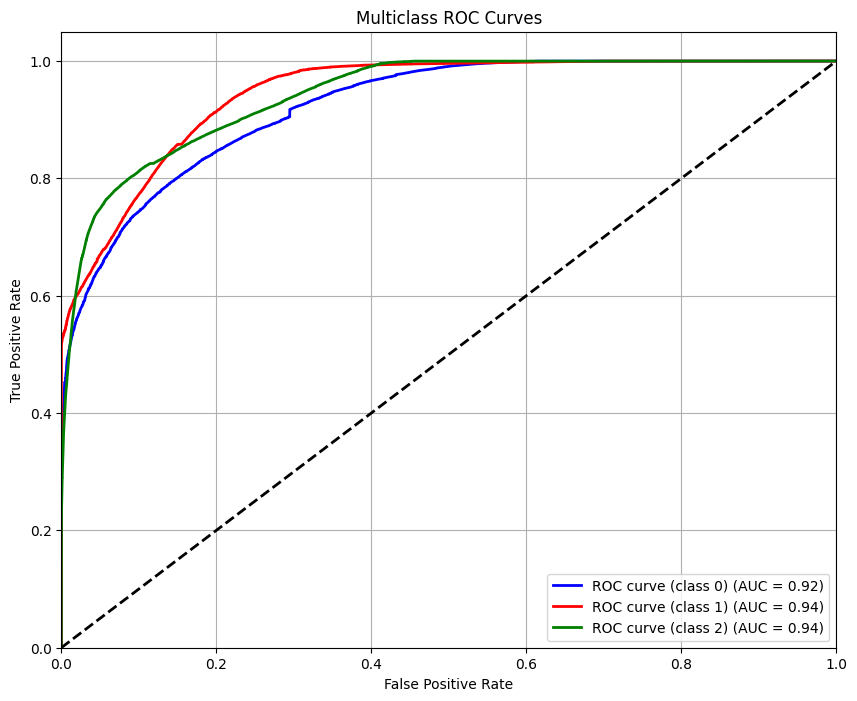

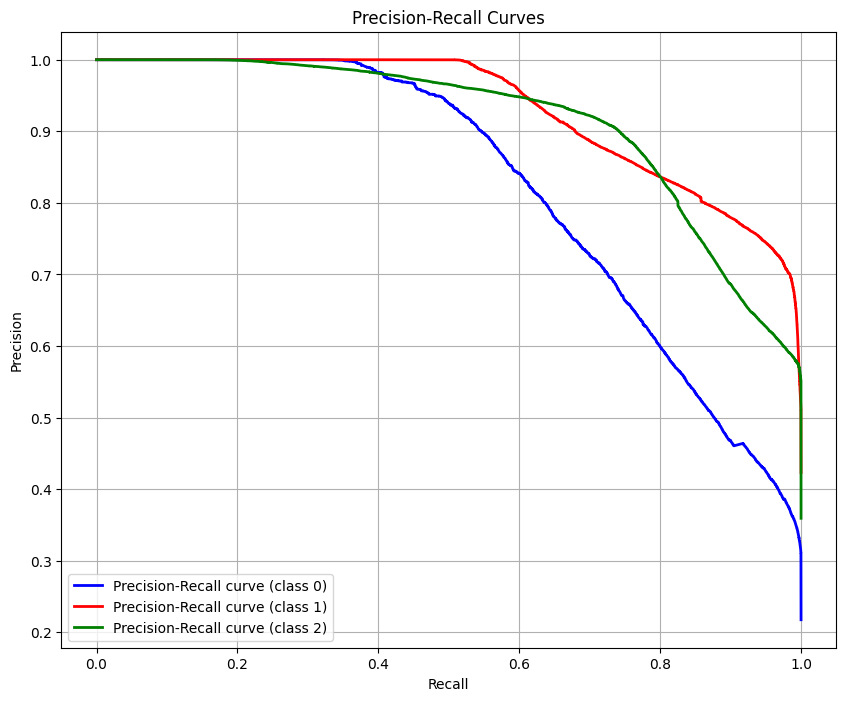

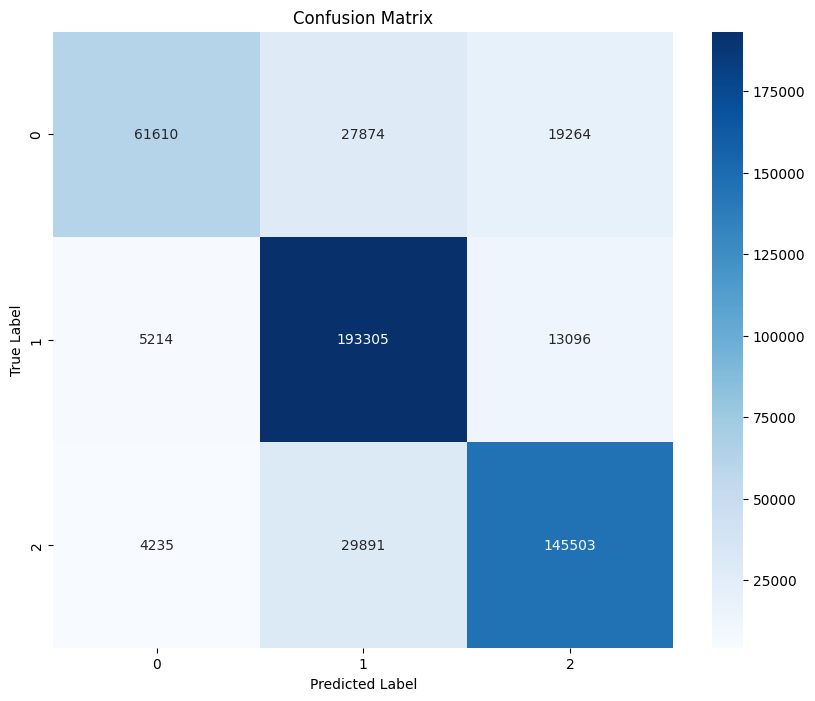

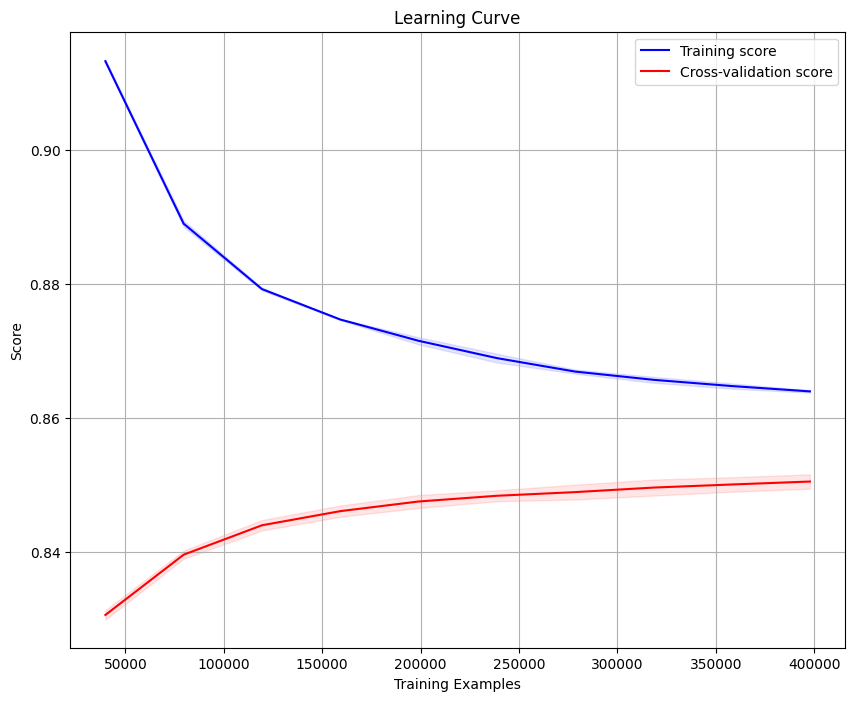

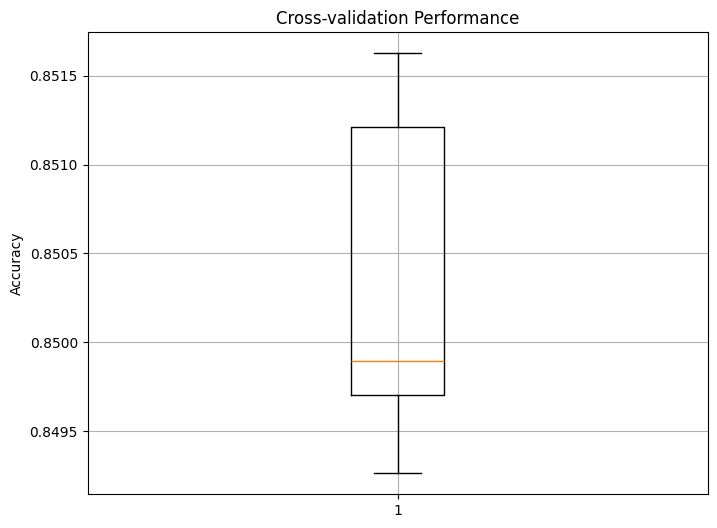

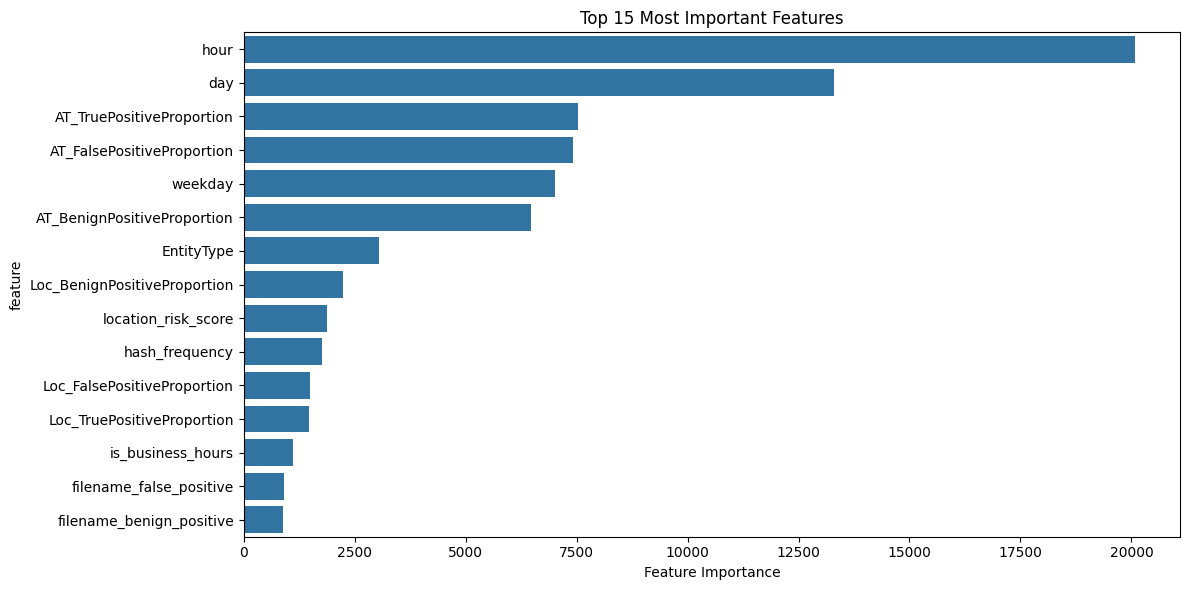

In [69]:
# Import required libraries
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import (cross_val_score, GridSearchCV, learning_curve, 
                                   StratifiedKFold)
from sklearn.metrics import (classification_report, accuracy_score, roc_curve, auc,
                           precision_recall_curve, confusion_matrix)

# Data preparation function
def prepare_data(train_data, test_data, target_col='IncidentGrade'):
    """
    Prepare and scale the training and testing data
    """
    # Split features and target
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    X_test = test_data.drop(columns=[target_col])
    y_test = test_data[target_col]
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to dataframe to preserve column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Plotting functions
def plot_multiclass_roc(model, X_test, y_test, n_classes):
    """Plot ROC curve for each class."""
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green']
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                label=f'ROC curve (class {i}) (AUC = {roc_auc:0.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_precision_recall(model, X_test, y_test, n_classes):
    """Plot precision-recall curve for each class."""
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green']
    
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, color=colors[i], lw=2,
                label=f'Precision-Recall curve (class {i})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plot confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_learning_curve(model, X, y):
    """Plot learning curve to compare training and validation performance."""
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_feature_importance(model, feature_names):
    """Plot feature importance."""
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    """Train and evaluate the LightGBM model with hyperparameter tuning."""
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [-1, 5, 7],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50, 100],
        'min_child_samples': [20, 30, 50],
        'boosting_type': ['gbdt'],
        'objective': ['multiclass'],
        'metric': ['multi_logloss'],
        'num_class': [3]
    }
    
    # Initialize cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initialize and perform grid search
    print("Starting hyperparameter tuning...")
    grid_search = GridSearchCV(
        estimator=lgb.LGBMClassifier(random_state=42),
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    print("\nBest parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Print performance metrics
    print("\nTest set performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Perform cross-validation on best model
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    print("\nCross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print("CV score std:", cv_scores.std())
    
    return best_model, y_pred, cv_scores

def main():
    # Prepare data
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(train_data, test_data)
    
    # Train and evaluate model
    best_model, y_pred, cv_scores = train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Generate all plots
    print("\nGenerating plots...")
    
    # 1. ROC curves
    plot_multiclass_roc(best_model, X_test_scaled, y_test, n_classes=3)
    
    # 2. Precision-Recall curves
    plot_precision_recall(best_model, X_test_scaled, y_test, n_classes=3)
    
    # 3. Confusion Matrix
    plot_confusion_matrix(y_test, y_pred)
    
    # 4. Learning Curve
    plot_learning_curve(best_model, X_train_scaled, y_train)
    
    # 5. Cross-validation performance
    plt.figure(figsize=(8, 6))
    plt.boxplot(cv_scores)
    plt.title('Cross-validation Performance')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    # 6. Feature importance
    plot_feature_importance(best_model, X_train_scaled.columns)

if __name__ == "__main__":
    main()

In [72]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Splitting features and target for training and testing
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define the optimal parameters

optimal_params = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'metric': 'multi_logloss',
    'min_child_samples': 20,
    'n_estimators': 300,
    'num_class': 3,
    'num_leaves': 100,
    'objective': 'multiclass'
}

# Basic LightGBM model with optimal parameters
print("Running Basic LightGBM with optimal parameters...")
basic_model = lgb.LGBMClassifier(**optimal_params, random_state=42)
basic_model.fit(X_train_scaled, y_train)
basic_predictions = basic_model.predict(X_test_scaled)
print("Basic LightGBM:")
print(f"Accuracy Score: {accuracy_score(y_test, basic_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, basic_predictions))

# LightGBM with class weights and optimal parameters
print("\nRunning LightGBM with Class Weights and optimal parameters...")
class_weights = {0: 1.0, 1: 0.5, 2: 0.75}  # Update weights as necessary
weighted_params = optimal_params.copy()
weighted_params['class_weight'] = class_weights
weighted_model = lgb.LGBMClassifier(**weighted_params, random_state=42)
weighted_model.fit(X_train_scaled, y_train)
weighted_predictions = weighted_model.predict(X_test_scaled)
print("\nLightGBM with Class Weights:")
print(f"Accuracy Score with Class Weights: {accuracy_score(y_test, weighted_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, weighted_predictions))

# LightGBM with SMOTE and optimal parameters
print("\nRunning LightGBM with SMOTE and optimal parameters...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
smote_model = lgb.LGBMClassifier(**optimal_params, random_state=42)
smote_model.fit(X_train_smote, y_train_smote)
smote_predictions = smote_model.predict(X_test_scaled)
print("\nLightGBM with SMOTE:")
print(f"Accuracy Score with SMOTE: {accuracy_score(y_test, smote_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, smote_predictions))

# LightGBM with Random Undersampling and optimal parameters
print("\nRunning LightGBM with Random Undersampling and optimal parameters...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)
undersampling_model = lgb.LGBMClassifier(**optimal_params, random_state=42)
undersampling_model.fit(X_train_under, y_train_under)
undersampling_predictions = undersampling_model.predict(X_test_scaled)
print("\nLightGBM with Random Undersampling:")
print(f"Accuracy Score with Random Undersampling: {accuracy_score(y_test, undersampling_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, undersampling_predictions))

Running Basic LightGBM with optimal parameters...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data points in the train set: 497324, number of used features: 72
[LightGBM] [Info] Start training from score -1.536534
[LightGBM] [Info] Start training from score -0.830165
[LightGBM] [Info] Start training from score -1.052978
Basic LightGBM:
Accuracy Score: 0.8008

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69    108748
           1       0.77      0.91      0.84    211615
           2       0.82      0.81      0.81    179629

    accuracy                           0.80    499992
   macro avg       0.82      0.76      0.78    499992
weighted avg       0.81      0.80      0.80  

## Hypertuning and cross validating best model: 2. Random Forest Model:

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to plot learning curves
def plot_learning_curves(estimator, X, y, cv=5):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, n_jobs=-1,
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, valid_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Prepare the data (assuming train_data and test_data are already available)
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize base model
base_rf = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Get best model
best_rf_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=skf)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Train final model with best parameters
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)
y_prob = best_rf_model.predict_proba(X_test_scaled)

# Print model evaluation metrics
print("\nTest Set Performance:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend()
plt.show()

# Plot learning curves
plot_learning_curves(best_rf_model, X_train_scaled, y_train)

# Plot feature importance
plot_feature_importance(best_rf_model, X_train.columns)

# # Save the best model and scaler
# import joblib
# joblib.dump(best_rf_model, 'best_rf_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
Best Cross-Validation Score: 0.8347

Test Set Performance:
Accuracy Score: 0.8111889790236644

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73    108748
           1       0.82      0.87      0.85    211615
           2       0.86      0.78      0.82    179629

    accuracy                           0.81    499992
   macro avg       0.80      0.80      0.80    499992
weighted avg       0.81      0.81      0.81    499992



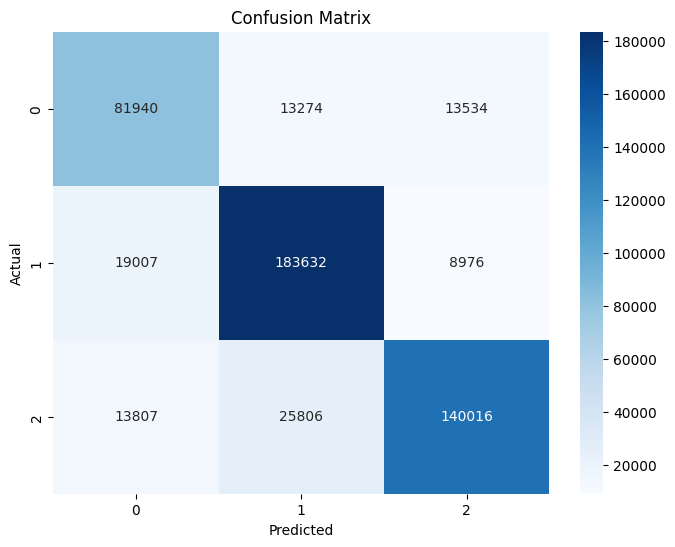

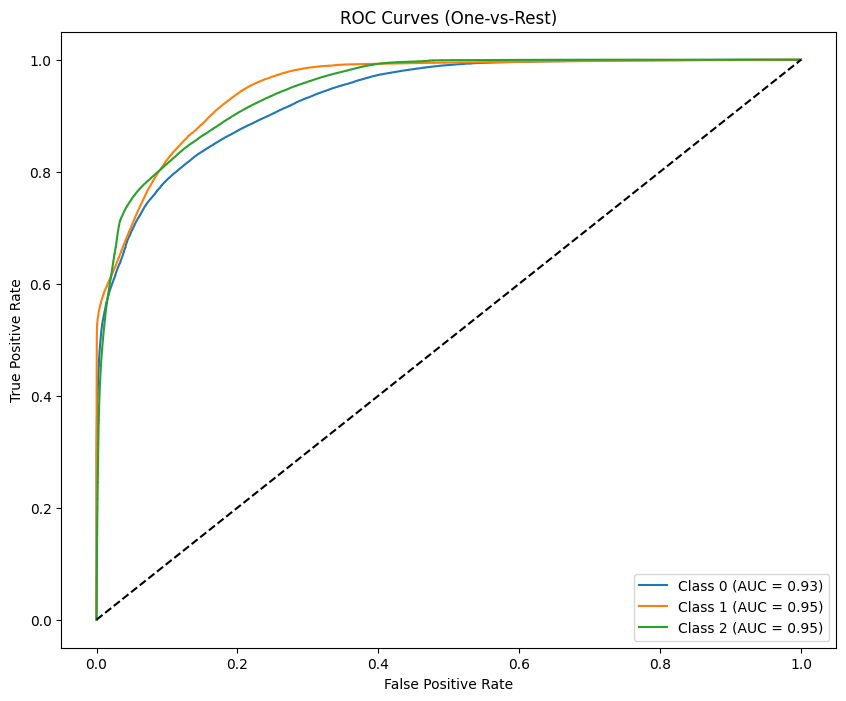

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider for splits
    'class_weight': ['balanced'],  # Handle class imbalance
}

# Initialize base model
base_rf = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Subsample training data (optional, for faster results on large datasets)
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.8, stratify=y_train, random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_sub, y_train_sub)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(random_search.best_score_))

# Get best model
best_rf_model = random_search.best_estimator_

# Train final model on full training data
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)
y_prob = best_rf_model.predict_proba(X_test_scaled)

# Evaluate the model
print("\nTest Set Performance:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (One-vs-Rest)
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

In [6]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler
# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch [1/20], Loss: 0.7319
Epoch [2/20], Loss: 0.7238
Epoch [3/20], Loss: 0.7206
Epoch [4/20], Loss: 0.7192
Epoch [5/20], Loss: 0.7186
Epoch [6/20], Loss: 0.7177
Epoch [7/20], Loss: 0.7169
Epoch [8/20], Loss: 0.7168
Epoch [9/20], Loss: 0.7166
Epoch [10/20], Loss: 0.7157
Epoch [11/20], Loss: 0.7154
Epoch [12/20], Loss: 0.7150
Epoch [13/20], Loss: 0.7145
Epoch [14/20], Loss: 0.7147
Epoch [15/20], Loss: 0.7145
Epoch [16/20], Loss: 0.7140
Epoch [17/20], Loss: 0.7139
Epoch [18/20], Loss: 0.7133
Epoch [19/20], Loss: 0.7135
Epoch [20/20], Loss: 0.7131

Test Set Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.59      0.69    108748
           1       0.83      0.77      0.80    211615
           2       0.70      0.88      0.78    179629

    accuracy                           0.77    499992
   macro avg       0.78      0.75      0.75    499992
weighted avg       0.78      0.77      0.77    499992



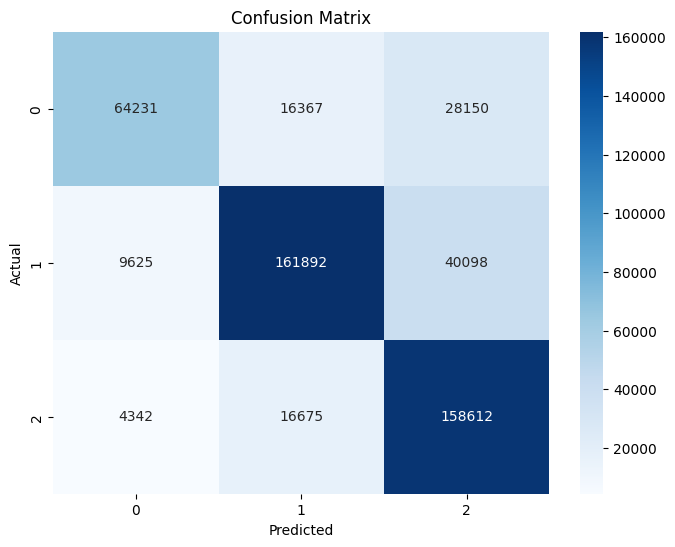

<ipython-input-7-185421e98daf>:104: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  y_prob = torch.tensor(y_prob_list).numpy()


NameError: name 'roc_curve' is not defined

<Figure size 1000x800 with 0 Axes>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train_scaled.shape[1]
num_classes = len(label_encoder.classes_)
model = NeuralNet(input_size, num_classes)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
y_pred_list = []
y_prob_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred_list.extend(preds.numpy())
        y_prob_list.extend(outputs.numpy())

# Convert predictions to labels
y_pred = label_encoder.inverse_transform(y_pred_list)

# Metrics
print("\nTest Set Performance:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve (One-vs-Rest)
plt.figure(figsize=(10, 8))
y_test_one_hot = nn.functional.one_hot(torch.tensor(y_test_encoded), num_classes=num_classes).numpy()
y_prob = torch.tensor(y_prob_list).numpy()

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend()
plt.show()


Epoch [1/50], Loss: 0.4941
Epoch [2/50], Loss: 0.4735
Epoch [3/50], Loss: 0.4689
Epoch [4/50], Loss: 0.4666
Epoch [5/50], Loss: 0.4656
Epoch [6/50], Loss: 0.4586
Epoch [7/50], Loss: 0.4558
Epoch [8/50], Loss: 0.4552
Epoch [9/50], Loss: 0.4538
Epoch [10/50], Loss: 0.4534
Epoch [11/50], Loss: 0.4523
Epoch [12/50], Loss: 0.4521
Epoch [13/50], Loss: 0.4525
Epoch [14/50], Loss: 0.4521
Epoch [15/50], Loss: 0.4514
Epoch [16/50], Loss: 0.4522
Epoch [17/50], Loss: 0.4511
Epoch [18/50], Loss: 0.4521
Epoch [19/50], Loss: 0.4518
Epoch [20/50], Loss: 0.4517
Epoch [21/50], Loss: 0.4523
Epoch [22/50], Loss: 0.4517
Epoch [23/50], Loss: 0.4517
Epoch [24/50], Loss: 0.4520
Epoch [25/50], Loss: 0.4524
Epoch [26/50], Loss: 0.4519
Epoch [27/50], Loss: 0.4524
Epoch [28/50], Loss: 0.4516
Epoch [29/50], Loss: 0.4521
Epoch [30/50], Loss: 0.4517
Epoch [31/50], Loss: 0.4516
Epoch [32/50], Loss: 0.4515
Epoch [33/50], Loss: 0.4513
Epoch [34/50], Loss: 0.4519
Epoch [35/50], Loss: 0.4516
Epoch [36/50], Loss: 0.4516
E

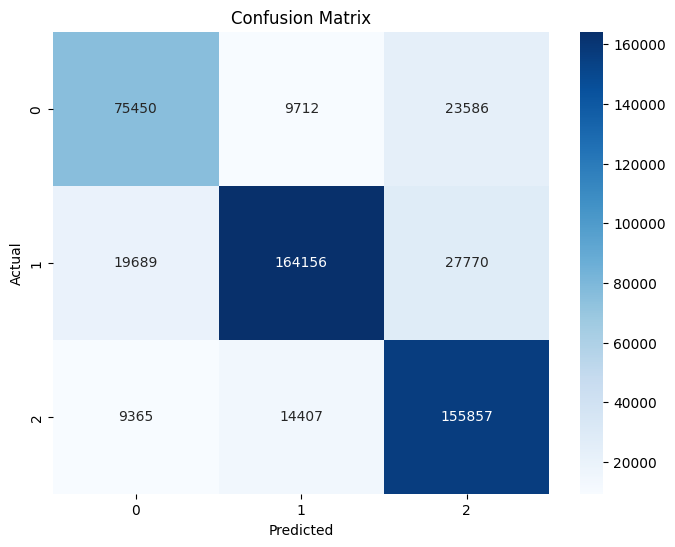

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_test = test_data.drop(columns=['IncidentGrade'])
y_test = test_data['IncidentGrade']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Calculate class weights to handle imbalance
class_counts = np.bincount(y_train)
class_weights = {i: len(y_train) / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}
weights = torch.tensor(list(class_weights.values()), dtype=torch.float32)

# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network with Dropout
class ImprovedModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = ImprovedModel(input_dim, num_classes)

# Loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train the model
epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Classification report
print("\nTest Set Performance:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Stacked Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.69      0.70    108748
           1       0.85      0.81      0.83    211615
           2       0.78      0.84      0.81    179629

    accuracy                           0.80    499992
   macro avg       0.78      0.78      0.78    499992
weighted avg       0.80      0.80      0.80    499992



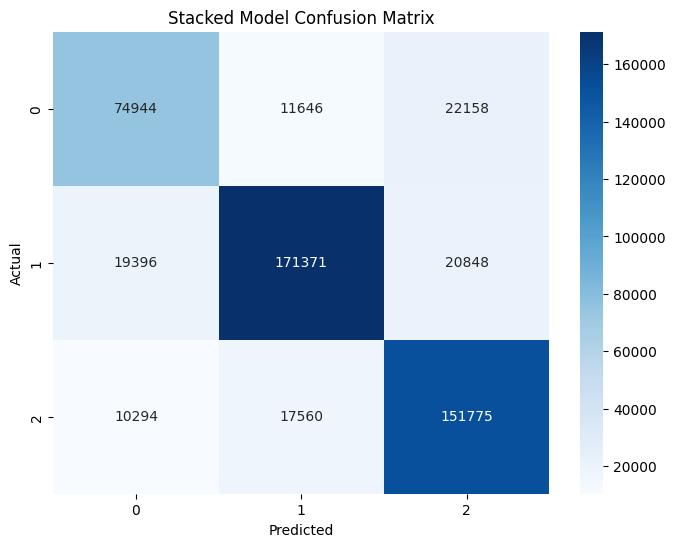

In [13]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader
import torch
import numpy as np

class NeuralNetPredictor(BaseEstimator, TransformerMixin):
    def __init__(self, model, device, batch_size=64):
        self.model = model.to(device)
        self.device = device
        self.batch_size = batch_size
        self.classes_ = None  # Initialize the attribute

    def fit(self, X, y=None):
        """Set the classes_ attribute during fitting"""
        if y is not None:
            self.classes_ = np.unique(y)  # Store unique class labels
        return self  # No fitting required for the neural network

    def predict_proba(self, X):
        """Get class probabilities from the neural network"""
        self.model.eval()
        dataloader = DataLoader(torch.tensor(X, dtype=torch.float32), batch_size=self.batch_size, shuffle=False)
        preds = []
        with torch.no_grad():
            for batch in dataloader:
                batch = batch.to(self.device)
                outputs = self.model(batch)
                probs = torch.softmax(outputs, dim=1)  # Get probabilities
                preds.extend(probs.cpu().numpy())
        return np.array(preds)

    def predict(self, X):
        """Get class predictions from the neural network"""
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)  # Convert probabilities to class labels

# Initialize the NeuralNetPredictor
nn_predictor = NeuralNetPredictor(model=model, device=device)

# Define the Random Forest Classifier with the given parameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    class_weight='balanced',
    random_state=42
)

# Create the Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[('nn', nn_predictor)],
    final_estimator=rf_classifier,
    passthrough=True  # Pass original features along with predictions
)

# Train the Stacking Classifier
stacked_model.fit(X_train_scaled, y_train_encoded)

# Test the Stacking Model
y_pred = stacked_model.predict(X_test_scaled)

# Evaluate the Model
print("\nStacked Model Performance:")
print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Stacked Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()